In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Dataset.csv')
df['Sales'] = df['Sales'].str.replace(',','')
df['Sales'] = np.asarray(df['Sales'],dtype='float')
df.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,01-01-2011,HU-2011-1220,High,OFF-TEN-10001585,...,05-01-2011,Second Class,Budapest,Storage,0.0,1,29.640,4,66,8.17
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,01-01-2011,IT-2011-3647632,High,OFF-PA-10001492,...,05-01-2011,Second Class,Stockholm,Paper,0.5,1,-26.055,3,45,4.82
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,01-01-2011,AG-2011-2040,Medium,OFF-TEN-10000025,...,06-01-2011,Standard Class,Constantine,Storage,0.0,1,106.140,2,408,35.46
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,FUR-FU-10003447,...,08-01-2011,Standard Class,New South Wales,Furnishings,0.1,1,37.770,5,114,4.70
4,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,OFF-PA-10001968,...,08-01-2011,Standard Class,New South Wales,Paper,0.1,1,15.342,2,55,1.80


In [10]:
df['Product Name'].nunique()

3788

In [13]:
df.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost'],
      dtype='object')

In [2]:
co = pd.read_csv('Cohort_details.csv')
co.head()

,YOJ,Discount,Sales,Profit,Recency,Monetary,Frequency,RFM
0,2011,0.142203,232.712907,27.894900,2.731001,2.962606,2.493366,2.728991
1,2012,0.145503,241.071575,20.524100,2.734151,3.084867,2.890593,2.903204
2,2013,0.146173,233.201070,29.503265,2.712538,2.981651,2.983180,2.892457
3,2014,0.144557,240.499093,31.348733,3.391410,2.960073,3.293406,3.214963
4,2015,0.120286,215.723810,5.235923,5.000000,3.342857,3.590476,3.977778


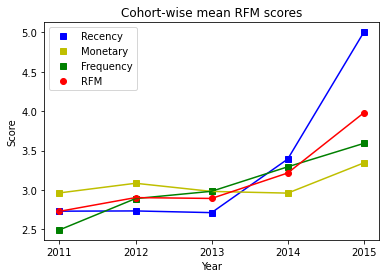

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(co['YOJ'],co['Recency'],'bs',co['YOJ'],co['Monetary'],'ys',co['YOJ'],co['Frequency'],'gs',co['YOJ'],co['RFM'],'ro')
plt.plot(co['YOJ'],co['Recency'],'b',co['YOJ'],co['Monetary'],'y',co['YOJ'],co['Frequency'],'g',co['YOJ'],co['RFM'],'r')
plt.legend(['Recency','Monetary','Frequency','RFM'])
plt.xticks([2011,2012,2013,2014,2015])
plt.title('Cohort-wise mean RFM scores')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()
plt.savefig('cohort.png')

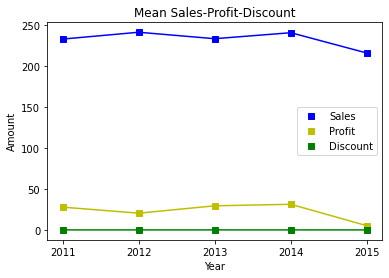

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(co['YOJ'],co['Sales'],'bs',co['YOJ'],co['Profit'],'ys',co['YOJ'],co['Discount'],'gs')
plt.plot(co['YOJ'],co['Sales'],'b',co['YOJ'],co['Profit'],'y',co['YOJ'],co['Discount'],'g')
plt.legend(['Sales','Profit','Discount'])
plt.xticks([2011,2012,2013,2014,2015])
plt.title('Mean Sales-Profit-Discount')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()
plt.savefig('cohort.png')

Text(0, 0.5, 'Amount')

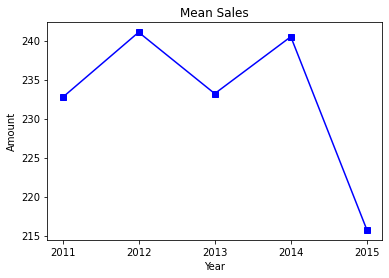

In [12]:
plt.plot(co['YOJ'],co['Sales'],'bs',co['YOJ'],co['Sales'],'b')
plt.xticks([2011,2012,2013,2014,2015])
plt.title('Mean Sales')
plt.xlabel('Year')
plt.ylabel('Amount')

In [ ]:
plt.plot(co['YOJ'],co['Profit'],'ys',co['YOJ'],co['Discount'],'gs')
plt.plot(co['YOJ'],co['Profit'],'y',co['YOJ'],co['Discount'],'g')
plt.legend(['Profit','Discount'])
plt.xticks([2011,2012,2013,2014,2015])
plt.title('Mean Profit and Mean Discount')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()
plt.savefig('cohort.png')

In [3]:
RFM_scores = pd.read_csv('q6_RFM_ANALYSIS.csv')
RFM_scores.index = RFM_scores['Customer ID']
RFM_scores.drop(columns='Customer ID',inplace=True)
series = RFM_scores['Overall Score'].loc[df['Customer ID']]
df['RFM'] = np.asarray(series)
df['Monetary'] = np.asarray(RFM_scores['Monetary Score'].loc[df['Customer ID']])
df['Recency'] = np.asarray(RFM_scores['Recency Score'].loc[df['Customer ID']])
df['Frequency'] = np.asarray(RFM_scores['Frequency Score'].loc[df['Customer ID']])
df.head()

,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost,RFM,Monetary,Recency,Frequency
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,01-01-2011,HU-2011-1220,High,OFF-TEN-10001585,...,0.0,1,29.640,4,66,8.17,2.000000,1,4,1
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,01-01-2011,IT-2011-3647632,High,OFF-PA-10001492,...,0.5,1,-26.055,3,45,4.82,1.666667,2,1,2
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,01-01-2011,AG-2011-2040,Medium,OFF-TEN-10000025,...,0.0,1,106.140,2,408,35.46,1.333333,2,1,1
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,FUR-FU-10003447,...,0.1,1,37.770,5,114,4.70,4.666667,5,5,4
4,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,01-01-2011,IN-2011-47883,Medium,OFF-PA-10001968,...,0.1,1,15.342,2,55,1.80,4.666667,5,5,4


In [18]:
df.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost', 'RFM', 'Monetary', 'Recency',
       'Frequency'],
      dtype='object')

In [25]:
df['Sales'] = df['Sales'].str.replace(',','')
df['Sales'] = np.asarray(df['Sales'],dtype='float')

In [49]:
dM = df[['Customer ID','Discount']].groupby(['Customer ID']).mean('Discount')
dM.head()

,Discount
Customer ID,
AA-103151,0.270000
AA-103152,0.040625
AA-103153,0.000000
AA-103154,0.090909
AA-103751,0.066667


In [50]:
dM['RFM'] = RFM_scores['Overall Score'].loc[dM.index]
dM['FM'] = (RFM_scores['Monetary Score'].loc[dM.index]+RFM_scores['Frequency Score'].loc[dM.index])/2
dM.head()

,Discount,RFM,FM
Customer ID,,,
AA-103151,0.270000,3.333333,2.5
AA-103152,0.040625,5.000000,5.0
AA-103153,0.000000,1.333333,1.5
AA-103154,0.090909,3.000000,3.5
AA-103751,0.066667,3.333333,2.5


In [51]:
dM.shape

(4873, 3)

Text(0.5, 1.0, 'Mean Discount vs RFM')

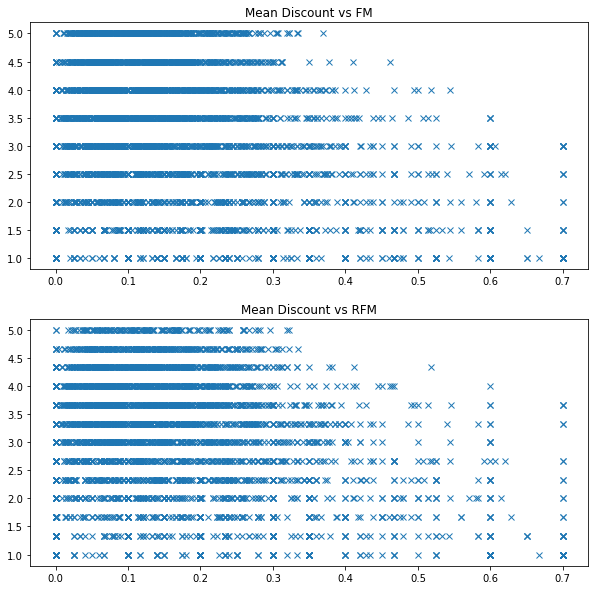

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(dM['Discount'],dM['FM'],'x')
plt.title('Mean Discount vs FM')
plt.subplot(2,1,2)
plt.plot(dM['Discount'],dM['RFM'],'x')
plt.title('Mean Discount vs RFM')

<b>Conclusion</b>: Law of diminishing returns

(array([1711., 1126.,  891.,  526.,  273.,  121.,   66.,   51.,   67.,
          41.]),
 array([0.  , 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56, 0.63, 0.7 ]),
 <BarContainer object of 10 artists>)

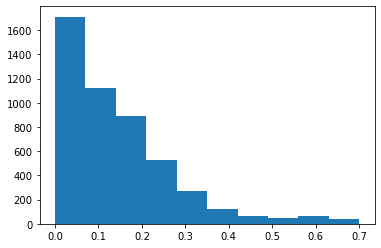

In [58]:
plt.hist(dM['Discount'])

In [75]:
dM = df[['Customer ID','Sales','Sub-Category']].groupby(['Customer ID','Sub-Category']).sum(['Sales'])
dM.head(10)

Sales
Customer ID Sub-Category       
AA-103151   Accessories    29.0
            Appliances    256.0
            Binders        46.0
            Bookcases     499.0
            Furnishings    99.0
            Labels         69.0
            Machines      116.0
            Supplies      331.0
AA-103152   Art           287.0
            Binders       111.0

In [83]:
dM = df[['Customer ID','Sales','Sub-Category']].groupby(['Sub-Category']).sum(['Sales'])
dM.head()

,Sales,RFM,Frequency
Sub-Category,,,
Accessories,749307.0,11059.333333,11456
Appliances,1011081.0,6261.000000,6365
Art,372163.0,16670.666667,17329
Binders,461952.0,21480.666667,22477
Bookcases,1466559.0,8739.666667,8926


In [89]:
new = df[['Customer ID','Sales','Sub-Category','RFM','Frequency','Monetary']].groupby(['Sub-Category']).mean(['Frequency','RFM'])
new.head()

,Sales,RFM,Frequency,Monetary
Sub-Category,,,,
Accessories,243.677073,3.596531,3.725528,3.686504
Appliances,576.114530,3.567521,3.626781,3.763533
Art,76.216056,3.414021,3.548843,3.428835
Binders,75.089727,3.491656,3.653609,3.500163
Bookcases,608.278308,3.624914,3.702198,3.889258


In [ ]:
'RFM','Frequency','Monetary','Recency'

In [87]:
dM[new.columns]=new
dM.head()

,Sales,RFM,Frequency,Monetary,Recency
Sub-Category,,,,,
Accessories,749307.0,3.596531,3.725528,3.686504,3.377561
Appliances,1011081.0,3.567521,3.626781,3.763533,3.312251
Art,372163.0,3.414021,3.548843,3.428835,3.264387
Binders,461952.0,3.491656,3.653609,3.500163,3.321196
Bookcases,1466559.0,3.624914,3.702198,3.889258,3.283285


Text(0.5, 1.0, 'Mean Discount vs RFM')

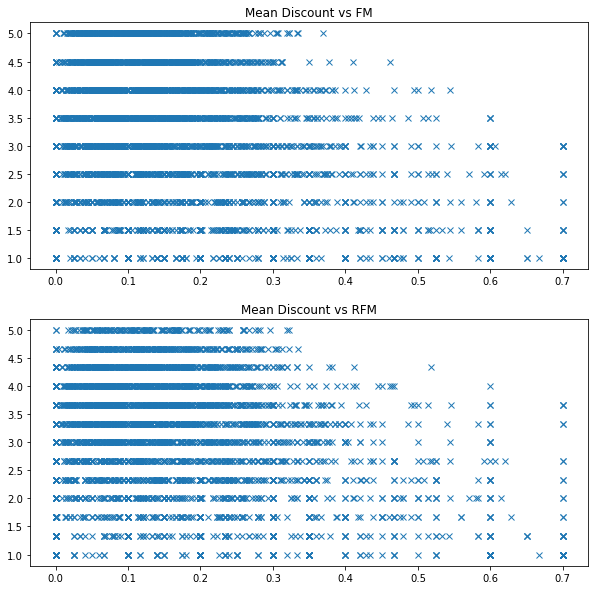

In [59]:
dM['RFM'] = RFM_scores['Overall Score'].loc[dM.index]
dM['FM'] = (RFM_scores['Monetary Score'].loc[dM.index]+RFM_scores['Frequency Score'].loc[dM.index])/2
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(dM['Discount'],dM['FM'],'x')
plt.title('Mean Discount vs FM')
plt.subplot(2,1,2)
plt.plot(dM['Discount'],dM['RFM'],'x')
plt.title('Mean Discount vs RFM')

In [62]:
df['Sub-Category'].unique()

array(['Storage', 'Paper', 'Furnishings', 'Supplies', 'Machines',
       'Appliances', 'Labels', 'Tables', 'Bookcases', 'Chairs',
       'Fasteners', 'Envelopes', 'Phones', 'Art', 'Accessories',
       'Copiers', 'Binders'], dtype=object)

In [96]:
d1.head()

Sub-Category
Accessories    159990.0
Appliances     218559.0
Art             67346.0
Binders         99866.0
Bookcases      327789.0
Name: Sales, dtype: float64

In [136]:
d1 = df.loc[df.RFM>=4].groupby('Sub-Category').sum('Sales')['Sales']
d2 = df.loc[df.RFM>=4].groupby('Sub-Category').mean(['Shipping Cost','Profit'])[['Profit','Shipping Cost']]

In [137]:
new = pd.DataFrame()
new['Total Sales'] = d1
new[['Mean Profit','Mean Shipping Cost']] = d2[['Profit','Shipping Cost']]
new.sort_values(by='Total Sales',inplace=True)
new

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,33294.0,5.837465,3.233727
Fasteners,38233.0,4.949099,3.947855
Envelopes,85135.0,14.521430,8.222533
Paper,113149.0,17.683376,7.800237
Supplies,129221.0,11.686698,11.461277
Art,170165.0,14.998197,9.536927
Furnishings,188918.0,18.557662,14.666901
Binders,234268.0,15.447730,9.387587
Accessories,365338.0,44.820958,27.634349


In [138]:
d1 = df.loc[df.RFM<=2].groupby('Sub-Category').sum('Sales')['Sales']
d2 = df.loc[df.RFM<=2].groupby('Sub-Category').mean(['Shipping Cost','Profit'])[['Profit','Shipping Cost']]
newb = pd.DataFrame()
newb['Total Sales'] = d1
newb[['Mean Profit','Mean Shipping Cost']] = d2[['Profit','Shipping Cost']]
newb.sort_values(by='Total Sales',inplace=True)
newb

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,6902.0,4.956873,2.701778
Fasteners,8564.0,4.745413,3.276487
Envelopes,12247.0,9.398160,6.200844
Supplies,17564.0,4.418555,7.731913
Paper,18095.0,11.293347,6.273490
Tables,29692.0,4.825986,76.923536
Furnishings,32338.0,3.702428,10.400003
Binders,33897.0,4.088856,4.797726
Art,40881.0,7.825503,7.133128


In [139]:
newb.sort_values(by='Total Sales',inplace=True)
newb

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,6902.0,4.956873,2.701778
Fasteners,8564.0,4.745413,3.276487
Envelopes,12247.0,9.398160,6.200844
Supplies,17564.0,4.418555,7.731913
Paper,18095.0,11.293347,6.273490
Tables,29692.0,4.825986,76.923536
Furnishings,32338.0,3.702428,10.400003
Binders,33897.0,4.088856,4.797726
Art,40881.0,7.825503,7.133128


In [122]:
d = df.groupby('Sub-Category').sum('Profits')
d.drop(columns=['Row ID','RFM','Recency','Monetary','Frequency','Shipping Cost'],inplace=True)
dq = df.groupby('Sub-Category').mean(['Shipping Cost','Discount'])
d['Mean Shipping Cost'] = dq.loc[d.index]['Shipping Cost']
d['Mean Profit'] = dq.loc[d.index]['Profit']
d.sort_values(by='Sales',inplace=True,ascending=False)
d

,Discount,Number of Records,Profit,Quantity,Sales,Mean Shipping Cost,Mean Profit
Sub-Category,,,,,,,
Phones,489.610,3357,216717.00580,11870,1706874.0,55.079682,64.556749
Copiers,260.418,2223,258567.54818,7454,1509439.0,71.748180,116.314687
Chairs,560.120,3434,140396.26750,12336,1501682.0,47.824506,40.884178
Bookcases,370.710,2411,161924.41950,8310,1466559.0,64.488580,67.160688
Storage,700.490,5059,108461.48980,16917,1127124.0,23.828036,21.439314
Appliances,248.700,1755,141680.58940,6078,1011081.0,61.709736,80.729681
Machines,252.000,1486,58867.87300,4906,779071.0,53.254272,39.614989
Tables,250.320,861,-64083.38870,3083,757034.0,92.754232,-74.429023
Accessories,370.480,3075,129626.30620,10946,749307.0,27.158808,42.154896


In [116]:
dq = df.groupby('Sub-Category').mean(['Shipping Cost','Discount'])
dq.head()

,Row ID,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost,RFM,Monetary,Recency,Frequency
Sub-Category,,,,,,,,,,,
Accessories,25799.323252,0.120481,1.0,42.154896,3.559675,243.677073,27.158808,3.596531,3.686504,3.377561,3.725528
Appliances,26639.120798,0.141709,1.0,80.729681,3.463248,576.114530,61.709736,3.567521,3.763533,3.312251,3.626781
Art,27586.600860,0.117362,1.0,11.868505,3.338317,76.216056,8.455282,3.414021,3.428835,3.264387,3.548843
Binders,27411.674090,0.179207,1.0,11.776633,3.483257,75.089727,7.831878,3.491656,3.500163,3.321196,3.653609
Bookcases,22741.763169,0.153758,1.0,67.160688,3.446703,608.278308,64.488580,3.624914,3.889258,3.283285,3.702198


In [124]:
d.to_csv('SubCat.csv')

In [155]:
d['Profit'].iloc[0:9]

Sub-Category
Phones         216717.00580
Copiers        258567.54818
Chairs         140396.26750
Bookcases      161924.41950
Storage        108461.48980
Appliances     141680.58940
Machines        58867.87300
Tables         -64083.38870
Accessories    129626.30620
Name: Profit, dtype: float64

Text(0, 0.5, 'Profits')

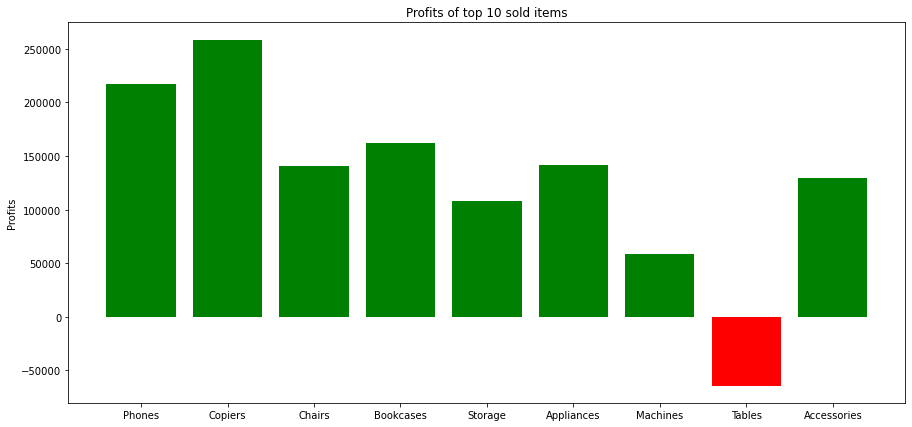

In [158]:
plt.figure(figsize=(15,7))
plt.bar(d.index[0:9],d['Profit'].iloc[0:9],color=['g','g','g','g','g','g','g','r','g','g'])
plt.title('Profits of top 10 sold items')
plt.ylabel('Profits')

In [159]:
d['Sales']

Sub-Category
Phones         1706874.0
Copiers        1509439.0
Chairs         1501682.0
Bookcases      1466559.0
Storage        1127124.0
Appliances     1011081.0
Machines        779071.0
Tables          757034.0
Accessories     749307.0
Binders         461952.0
Furnishings     385609.0
Art             372163.0
Paper           244307.0
Supplies        243090.0
Envelopes       170926.0
Fasteners        83254.0
Labels           73433.0
Name: Sales, dtype: float64

3.0

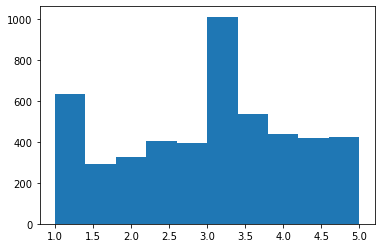

In [131]:
plt.hist(RFM_scores['Overall Score'])

In [135]:
RFM_scores['Overall Score'].quantile([0.25,0.75])

0.25    2.0
0.75    4.0
Name: Overall Score, dtype: float64

In [140]:
new.to_csv('Top_trans.csv')
newb.to_csv('bottom.csv')

In [141]:
new

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,33294.0,5.837465,3.233727
Fasteners,38233.0,4.949099,3.947855
Envelopes,85135.0,14.521430,8.222533
Paper,113149.0,17.683376,7.800237
Supplies,129221.0,11.686698,11.461277
Art,170165.0,14.998197,9.536927
Furnishings,188918.0,18.557662,14.666901
Binders,234268.0,15.447730,9.387587
Accessories,365338.0,44.820958,27.634349


In [142]:
newb

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,6902.0,4.956873,2.701778
Fasteners,8564.0,4.745413,3.276487
Envelopes,12247.0,9.398160,6.200844
Supplies,17564.0,4.418555,7.731913
Paper,18095.0,11.293347,6.273490
Tables,29692.0,4.825986,76.923536
Furnishings,32338.0,3.702428,10.400003
Binders,33897.0,4.088856,4.797726
Art,40881.0,7.825503,7.133128


In [160]:
new

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,33294.0,5.837465,3.233727
Fasteners,38233.0,4.949099,3.947855
Envelopes,85135.0,14.521430,8.222533
Paper,113149.0,17.683376,7.800237
Supplies,129221.0,11.686698,11.461277
Art,170165.0,14.998197,9.536927
Furnishings,188918.0,18.557662,14.666901
Binders,234268.0,15.447730,9.387587
Accessories,365338.0,44.820958,27.634349


In [161]:
newb

,Total Sales,Mean Profit,Mean Shipping Cost
Sub-Category,,,
Labels,6902.0,4.956873,2.701778
Fasteners,8564.0,4.745413,3.276487
Envelopes,12247.0,9.398160,6.200844
Supplies,17564.0,4.418555,7.731913
Paper,18095.0,11.293347,6.273490
Tables,29692.0,4.825986,76.923536
Furnishings,32338.0,3.702428,10.400003
Binders,33897.0,4.088856,4.797726
Art,40881.0,7.825503,7.133128


In [4]:
R = RFM_scores

In [5]:
R.rename(columns={R.columns[0]:'R',R.columns[1]:'F',R.columns[2]:'M',R.columns[3]:'T'},inplace=True)
R.head()

,R,F,M,T
Customer ID,,,,
PB-192102,5,5,5,5.0
RA-199154,5,5,5,5.0
PS-190453,5,5,5,5.0
AT-107352,5,5,5,5.0
MM-179203,5,5,5,5.0


In [33]:
Hib_Risk = len(R[np.asarray(R.R<2)& np.asarray(R.F<4)])/4873*100
Hib_Risk

18.017648265955263

In [34]:
Cant_Lose = len(R[np.asarray(R.R<2)& np.asarray(R.F>=4)])/4873*100
Cant_Lose

1.9905602298378824

In [35]:
Champs = len(R[np.asarray(4<=R.R)& np.asarray(R.F>=4)])/4873*100
Champs

21.937205007182435

In [36]:
Need_att = len(R[np.asarray(2<=R.R)& np.asarray(4>R.R) & np.asarray(R.F>=2)& np.asarray(R.F<4)])/4873*100
Need_att

17.627744715780832

In [37]:
Loyal = len(R[np.asarray(4<=R.F)& np.asarray(5>R.F) & np.asarray(R.R>=2)& np.asarray(R.R<4)])/4873*100
Loyal

8.680484301251795

In [38]:
pot_loyal = len(R[np.asarray(R.R>=4) & np.asarray(R.F>=1)& np.asarray(R.F<=3)])/4873*100
pot_loyal

18.058690744920995

In [39]:
new = len(R[np.asarray(R.R>=4) & np.asarray(R.F==1)& np.asarray(R.F<3)])/4873*100
new

3.078185922429715

In [40]:
abt_sleep = len(R[np.asarray(2<=R.R)& np.asarray(4>R.R) & np.asarray(R.F<2)])/4873*100
abt_sleep

6.300020521239483

In [41]:
Cant_Lose+Hib_Risk+abt_sleep+Loyal+Need_att+Champs+pot_loyal+new

95.6905397085984

In [236]:
abt_sleep

4873

In [2]:
df = pd.read_csv('Dataset.csv')
df2 = df.groupby(['Customer ID']).aggregate({'Ship Date': ['min']}) 
df2.columns = list(map(''.join, df2.columns.values))
df2['Ship Datemin'] = pd.to_datetime(df2['Ship Datemin'],dayfirst=True)
for i in range(len(df2)):
    df2.iloc[i,0] = df2.iloc[i,0].year
df2.head()

,Ship Datemin
Customer ID,
AA-103151,2014
AA-103152,2014
AA-103153,2013
AA-103154,2011
AA-103751,2012


In [6]:
R['YOJ'] = df2.loc[R.index]

In [7]:
R.head()

,R,F,M,T,YOJ
Customer ID,,,,,
PB-192102,5,5,5,5.0,2011
RA-199154,5,5,5,5.0,2011
PS-190453,5,5,5,5.0,2014
AT-107352,5,5,5,5.0,2012
MM-179203,5,5,5,5.0,2011


In [24]:
Loyal = (R[np.asarray(4<=R.F)& np.asarray(5>R.F) & np.asarray(R.R>=2)& np.asarray(R.R<4)])
sum(Loyal.YOJ==2012)

100

In [23]:
Need_att = (R[np.asarray(2<=R.R)& np.asarray(4>R.R) & np.asarray(R.F>=2)& np.asarray(R.F<4)])
sum(Need_att.YOJ==2012)

162

In [17]:
sum(R.YOJ==2012)

978

In [26]:
Champs = (R[np.asarray(4<=R.R)& np.asarray(R.F>=3)])
sum(Champs.YOJ==2012)

269

In [27]:
100+162+269

531

In [30]:
abt_sleep = (R[np.asarray(2<=R.R)& np.asarray(4>R.R) & np.asarray(R.F<2)])
sum(abt_sleep.YOJ==201)

143

In [42]:
pot_loyal = (R[np.asarray(R.R>=4) & np.asarray(R.F>=1)& np.asarray(R.F<=3)])
sum(pot_loyal.YOJ==2012)

159

In [43]:
159+162+269

590

In [44]:
new=pd.read_csv('Top_trans.csv')
newb=pd.read_csv('bottom.csv')

In [46]:
new.sort_values(by='Total Sales',ascending=False,inplace=True)
newb.sort_values(by='Total Sales',ascending=False,inplace=True)

In [47]:
new.head()

,Sub-Category,Total Sales,Mean Profit,Mean Shipping Cost
16,Phones,927165.0,78.974720,63.413626
15,Chairs,844020.0,58.536732,56.157628
14,Bookcases,793007.0,89.714318,71.829396
13,Copiers,790966.0,140.188977,78.022959
12,Appliances,545080.0,103.089499,74.323821


In [48]:
newb.head()

,Sub-Category,Total Sales,Mean Profit,Mean Shipping Cost
16,Storage,100386.0,9.952853,16.940141
15,Phones,84972.0,27.568545,33.786759
14,Bookcases,80499.0,-11.097360,44.213659
13,Copiers,75865.0,61.427466,52.282908
12,Chairs,65853.0,14.421646,31.429296
